# 16.1 

In [33]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 16.2 Task 1

For n men and n women, the upperbound for the maximum number of stable matchings is $2^{n/2}$

# 16.3 Task 2 

## 16.3.1 part a)

In [150]:
def IS_STABLE(preference1, preference2, matching):
    flag = 0
    for key in matching:
        husband = key
        wife = matching[key] # find wife 
        preference_husband = preference1[key] # find the husband's preference 
        index_wife =  preference_husband.index(wife) #  find the index of wife in the husband's preference

        for i in range(index_wife):
            woman = preference_husband[i]
            preference_woman = preference2[woman] # the preference of a "preferred woman"
            # find their own husband
            her_husband = list(matching)[list(matching.values()).index(woman)]
#             her_husband = [key for key, value in matching.items() if value == woman][0]

            
            # find the index of her own husband
            index_her_husband = preference_woman.index(her_husband)
            
            # find the index of the husband
            index_husband = preference_woman.index(husband)
            
            if index_husband < index_her_husband:
                flag = 1
                break
    if flag == 0:
        print("stable")
    if flag == 1:
        print("unstable")
    return flag

In [151]:
prefer1 = {
    "A": ["c", "b", "d", "a"],
    "B": ["b", "a", "c", "d"],
    "C": ["b", "d", "a", "c"],
    "D": ["c", "a", "d", "b"]
}
prefer2 = {
    "a": ["A", "B", "D", "C"],
    "b": ["C", "A", "D", "B"],
    "c": ["C", "B", "D", "A"],
    "d": ["B", "A", "C", "D"]
}

matching1 = {
    "A": "d",
    "B": "a",
    "C": "b",
    "D": "c"
} # stable

matching2 = {
    "A": "a",
    "B": "b",
    "C": "c",
    "D": "d"
} # unstable

In [152]:
# test 1
IS_STABLE(prefer1, prefer2, matching1)

stable


0

In [153]:
# test 2
IS_STABLE(prefer1, prefer2, matching2)

unstable


1

## 16.3.2 part b)

The data structure of the preference table and the matching is both dictionaries. Dictionaries, with their key-value pairs, provide a natural and expressive way to represent married couples and the preference lists of each individual. Besides, in the dictionary of the preference table, the preference of each person is denoted by a list because it's mutable and ordered. 

## 16.3.3 part c)

Suppose the number of pairs in the dictionary is $n$, the number of elements in each preference list is also $n$. Then we have to iterate the outer loop $k$ times and iterate the inner loop up to $n$ times. Besides, the time complexity of the steps inside the inner loop is $\mathcal{O}(1)$. Therefore, the time complexity of the whole function is $\mathcal{O}(n^2)$.

# 16.4 Task 3

## 16.4.1 part a)

In [154]:
from itertools import permutations

# Define IS_STABLE_new which is IS_STABLE without printing out "stable" or "unstable"
def IS_STABLE_new(preference1, preference2, matching):
    flag = 0
    for key in matching:
        husband = key
        wife = matching[key] # find wife 
        preference_husband = preference1[key] # find the husband's preference 
        index_wife =  preference_husband.index(wife) #  find the index of wife in the husband's preference

        for i in range(index_wife):
            woman = preference_husband[i]
            preference_woman = preference2[woman] # the preference of a "preferred woman"
            # find their own husband
            her_husband = list(matching)[list(matching.values()).index(woman)]
#             her_husband = [key for key, value in matching.items() if value == woman][0]
            
            # find the index of her own husband
            index_her_husband = preference_woman.index(her_husband)
            
            # find the index of the husband
            index_husband = preference_woman.index(husband)
            
            if index_husband < index_her_husband:
                flag = 1
                break
    return flag

def STABLE__MATCHINGS(preference1, preference2):
    # find all the wives
    first_key = next(iter(preference1))
    wives = preference1[first_key]
    
    # find all the husbands
    second_key = next(iter(preference2))
    husbands = preference2[second_key]
    
    all_matchings = [dict(zip(husbands, perm)) for perm in permutations(wives)] # get all the possible matchings
    
    stable_sols = []
    for d in all_matchings:
        flag = IS_STABLE_new(preference1, preference2, d)
        if flag == 0:
            stable_sols.append(d)
    return stable_sols

In [155]:
# test function STABLE__MATCHINGS
# test 1
solutions = STABLE__MATCHINGS(prefer1, prefer2)
solutions

[{'A': 'd', 'B': 'a', 'D': 'c', 'C': 'b'}]

In [156]:
# test 2
prefer2_1 = {
    "A": ["a", "b", "c", "d", "e"],
    "B": ["b", "c", "d", "e", "a"],
    "C": ["c", "d", "e", "a", "b"],
    "D": ["d", "e", "a", "b", "c"],
    "E": ["e", "a", "b", "c", "d"]
}

prefer2_2 = {
    "a": ["B", "C", "D", "E", "A"],
    "b": ["C", "D", "E", "A", "B"],
    "c": ["D", "E", "A", "B", "C"],
    "d": ["E", "A", "B", "C", "D"],
    "e": ["A", "B", "C", "D", "E"]
}

STABLE__MATCHINGS(prefer2_1, prefer2_2)

[{'B': 'a', 'C': 'b', 'D': 'c', 'E': 'd', 'A': 'e'},
 {'B': 'b', 'C': 'c', 'D': 'd', 'E': 'e', 'A': 'a'},
 {'B': 'c', 'C': 'd', 'D': 'e', 'E': 'a', 'A': 'b'},
 {'B': 'd', 'C': 'e', 'D': 'a', 'E': 'b', 'A': 'c'},
 {'B': 'e', 'C': 'a', 'D': 'b', 'E': 'c', 'A': 'd'}]

## 16.4.2 part b)

I create a list to store all possible matchings and each matching is a dictionary. Besides, I also use a list to store all stable solutions.

## 16.4.3 part c)

The number of elements in "all_matchings" is $n!$, so the loop should be iterated $n!$ times. Since the time complexity of function "IS_STABLE_new" is $n^2$, which is the same as that of the function "IS_STABLE" (I just delete the "print" function in "IS_STABLE" and name it as "IS_STABLE_new"), the time complexity of function "STABLE__MATCHINGS" is $\mathcal{O}(n!\cdot n^2)$.

# 16.5 Task 4

In [42]:
import random
random.sample(range(1,10),6)

[3, 1, 2, 9, 5, 7]

In [43]:
def gnt_preferences(list1, list2):
    dic1 = {}
    dic2 = {}
    k = len(list1)
    for item in list1:
        dic1[item] = random.sample(list2, k)
    for key in list2:
        dic2[key] = random.sample(list1, k)
    return dic1, dic2

In [46]:
# test function gnt_preferences
l1 = ["A", "B", "C", "D"]
l2 = ["a", "b", "c", "d"]
dic1, dic2 = gnt_preferences(l1, l2)
print(pd.DataFrame(dic1))
#print(dic2)

   A  B  C  D
0  a  c  d  c
1  c  a  a  b
2  d  d  b  a
3  b  b  c  d


# 16.6 Task 5

## Replicability for Task 2

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
$\textbf{Input}$: two preference tables and one matching <br>
$\textbf{Set}$ flag = 0<br>
$\textbf{For}$ each man: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{For}$ each woman who the man prefers than his wife:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{If}$ the woman prefer the man than her husband: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The marriage is unstable;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{Set}$ flag = 1;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{break}$<br>
$\textbf{If}$ flag = 0<br>
    &nbsp;&nbsp;&nbsp;&nbsp; The marriage is stable;<br>
$\textbf{Output}$: The marriage is stable or not
</div>

## Replicability for Task 3

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
$\textbf{Input}$: two preference tables <br>
find all the possible matchings<br>
$\textbf{For}$ each matching: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{If}$ it is stable: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Put it in the set of stable solutions <br>
$\textbf{Output}$: The set of all the stable solutions
</div>

# 16.7 Task 6

In [98]:
import time
start = time.perf_counter()
for i in range(1000000) :
    x = 2
end = time.perf_counter()   
print(end-start)

0.0350722000002861


In [122]:
list1 = [
    [["A", "B"], ["a", "b"]],
    [["A", "B", "C"], ["a", "b", "c"]],
    [["A", "B", "C", "D"], ["a", "b", "c", "d"]],
    [["A", "B", "C", "D", "E"], ["a", "b", "c", "d", "e"]],
    [["A", "B", "C", "D", "E", "F"], ["a", "b", "c", "d", "e", "f"]],
    [["A", "B", "C", "D", "E", "F", "G"], ["a", "b", "c", "d", "e", "f", "g"]],
    [["A", "B", "C", "D", "E", "F", "G","H"], ["a", "b", "c", "d", "e", "f", "g", "h"]],
    [["A", "B", "C", "D", "E", "F", "G","H", "I"], ["a", "b", "c", "d", "e", "f", "g", "h", "i"]],
    [["A", "B", "C", "D", "E", "F", "G","H", "I","J"], ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]]
]

print(list1[0][0])

['A', 'B']


In [162]:
import numpy as np
np.random.seed(1)
time1_average = []
time2_average = []
for i in range(len(list1)-2):
    l1 = list1[i][0]
    l2 = list1[i][1]
    prefer1, prefer2 = gnt_preferences(l1, l2)
    matching = dict(zip(l1, l2))
    time1 = []
    time2 = []
    for j in range(100):
        start1 = time.perf_counter()
        IS_STABLE_new(prefer1, prefer2, matching)
        end1 = time.perf_counter()
        time1.append(end1 - start1)
    
        start2 = time.perf_counter()
        STABLE__MATCHINGS(prefer1, prefer2)
        end2 = time.perf_counter()
        time2.append(end2 - start2)
    
    time1_average.append(np.mean(time1))
    time2_average.append(np.mean(time2))

In [159]:
print(time1_average)
print(time2_average)

[1.8570013344287873e-06, 3.1790000502951443e-06, 5.0929986173287036e-06, 2.1210004342719914e-06, 6.0759985353797675e-06, 9.916001581586897e-06, 1.408200041623786e-05]
[5.685998185072094e-06, 2.0163999579381198e-05, 0.00010834800195880234, 0.00041548999899532646, 0.0031198570021661, 0.02611208299989812, 0.246268125998904]


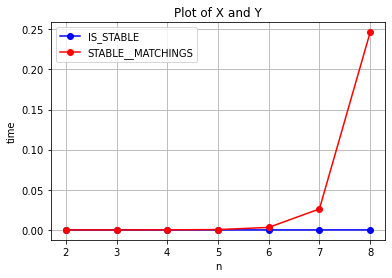

In [160]:
import matplotlib.pyplot as plt

x = list(range(2, 9))
# Plotting
plt.plot(x, time1_average, marker='o', linestyle='-', color='b', label='IS_STABLE')
plt.plot(x, time2_average, marker='o', linestyle='-', color='r', label='STABLE__MATCHINGS')
plt.xlabel('n')
plt.ylabel('time')
plt.title('Plot of X and Y')
plt.legend()
plt.grid(True)
plt.show()


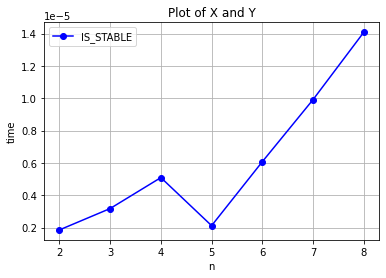

In [161]:
x = list(range(2, 9))
# Plotting
plt.plot(x, time1_average, marker='o', linestyle='-', color='b', label='IS_STABLE')
plt.xlabel('n')
plt.ylabel('time')
plt.title('Plot of X and Y')
plt.legend()
plt.grid(True)
plt.show()

# 16.8 Task 7

## 16.8.1 part a)

The very undesirable imaginary man is denoted by "omega" and we put it at the end of each person's preference list as follows.

In [13]:
prefer2_1 = {
    "A": ["a", "b", "c", "d", "e"],
    "B": ["b", "c", "d", "e", "a"],
    "C": ["c", "d", "e", "a", "b"],
    "D": ["d", "e", "a", "b", "c"],
    "E": ["e", "a", "b", "c", "d"]
}

prefer2_2 = {
    "a": ["B", "C", "D", "E", "A"],
    "b": ["C", "D", "E", "A", "B"],
    "c": ["D", "E", "A", "B", "C"],
    "d": ["E", "A", "B", "C", "D"],
    "e": ["A", "B", "C", "D", "E"]
}
prefer3_1 = {key: value + ["omega"] for key, value in prefer2_1.items()}
prefer3_2 = {key: value + ["omega"] for key, value in prefer2_2.items()}

# Display the resulting dictionaries
print(prefer3_1)
print(prefer3_2)

{'A': ['a', 'b', 'c', 'd', 'e', 'omega'], 'B': ['b', 'c', 'd', 'e', 'a', 'omega'], 'C': ['c', 'd', 'e', 'a', 'b', 'omega'], 'D': ['d', 'e', 'a', 'b', 'c', 'omega'], 'E': ['e', 'a', 'b', 'c', 'd', 'omega']}
{'a': ['B', 'C', 'D', 'E', 'A', 'omega'], 'b': ['C', 'D', 'E', 'A', 'B', 'omega'], 'c': ['D', 'E', 'A', 'B', 'C', 'omega'], 'd': ['E', 'A', 'B', 'C', 'D', 'omega'], 'e': ['A', 'B', 'C', 'D', 'E', 'omega']}


## 16.8.2 part b)

In [82]:
def algorithm(preference1, preference2):
    preference1 = {key: value + ["omega"] for key, value in preference1.items()} # n
    preference2 = {key: value + ["omega"] for key, value in preference2.items()} # n
    matching = {}
    husbands = list(preference1.keys())
    wives = list(preference2.keys())
    k = 0
    n = len(wives)
    for key in wives: # n
        matching[key] = "omega"
    while k < n: # n
        X = husbands[k] # (k+1)-st man # time complexity of finding an index in a list 
        while X != "omega": # n
            x = preference1[X][0] # best choice remaining on X's list 
            prefer_x = preference2[x]
            fiance_x = matching[x]
            if prefer_x.index(X) < prefer_x.index(fiance_x):
                matching[x] = X
                X = fiance_x
            if X != "omega":
                preference1[X] = [element for element in preference1[X] if element != x]
        k = k + 1
    return matching


In [83]:
# test 
algorithm(prefer2_1, prefer2_2)

{'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}

## 16.8.3 part c)

The time complexity of the steps $\texttt{preference1 = \{key: value + ['omega'] for key, value in preference1.items()\}}$ and $\texttt{preference2 = \{key: value + ['omega'] for key, value in preference2.items()\}}$ is both $\mathcal{O}(n)$. However, the overall time complexity of the algorithm is dominated by the nested loops. The outer loop, iterating at most $n$ times, and the inner loop, which depends on the length of the preference lists ($m$), result in a total time complexity of $\mathcal{O}(n^2)$. Therefore, the time complexity of the entire function is $\mathcal{O}(n^2)$.

# 16.9 Task 8

In [71]:
import pandas as pd

In [132]:
def algorithm_table(table1, table2):
    preference1 = table1.to_dict(orient='list')
    preference2 = table2.to_dict(orient='list')
    preference1 = {key: value + ["omega"] for key, value in preference1.items()}
    preference2 = {key: value + ["omega"] for key, value in preference2.items()}
    matching = {}
    husbands = list(preference1.keys())
    wives = list(preference2.keys())
    k = 0
    n = len(wives)
    for key in wives:
        matching[key] = "omega"
    while k < n:
        X = husbands[k] # (k+1)-st man
        while X != "omega":
            x = preference1[X][0]
            prefer_x = preference2[x]
            fiance_x = matching[x]
            if prefer_x.index(X) < prefer_x.index(fiance_x):
                matching[x] = X
                X = fiance_x
            if X != "omega":
                preference1[X] = [element for element in preference1[X] if element != x]
        k = k + 1
    matching = pd.DataFrame({"Men": list(matching.values()),
                            "Women": list(matching.keys())})
    return matching

In [133]:
table1 = pd.DataFrame({"A" : ["c","b","d","a"],
                       "B" : ["b","a","c","d"],
                       "C" : ["b","d","a","c"],
                       "D" : ["c","a","d","b"]
                      })

table2 = pd.DataFrame({"a" : ["A","B","D","C"],
                       "b" : ["C","A","D","B"],
                       "c" : ["C","B","D","A"],
                       "d" : ["B","A","C","D"]
                      })

In [134]:
# test function algorithm_table
stable_table = algorithm_table(table1, table2) # stable
stable_table

,Men,Women
0,B,a
1,C,b
2,D,c
3,A,d


In [102]:
df_dict = {}

for i in range(4):
    key = stable_table["Men"][i]
    value = stable_table["Women"][i]
    df_dict[key] = value

df_dict

{'a': 'B', 'b': 'C', 'c': 'D', 'd': 'A'}

# 16.10 Task 9

In [ ]:
def gnt_preferences(list1, list2):
    dic1 = {}
    dic2 = {}
    k = len(list1)
    for item in list1:
        dic1[item] = random.sample(list2, k)
    for key in list2:
        dic2[key] = random.sample(list1, k)
    return dic1, dic2

## Test for function IS_STABLE

Let's use the example in the literature. Given preference list "prefer1" and "prefer2", we know that "matching1" is stable and "matching2" is unstable.

In [78]:
prefer1 = {
    "A": ["c", "b", "d", "a"],
    "B": ["b", "a", "c", "d"],
    "C": ["b", "d", "a", "c"],
    "D": ["c", "a", "d", "b"]
}
prefer2 = {
    "a": ["A", "B", "D", "C"],
    "b": ["C", "A", "D", "B"],
    "c": ["C", "B", "D", "A"],
    "d": ["B", "A", "C", "D"]
}

matching1 = {
    "A": "d",
    "B": "a",
    "C": "b",
    "D": "c"
} # stable

matching2 = {
    "A": "a",
    "B": "b",
    "C": "c",
    "D": "d"
} # unstable

# test 1
flag1 = IS_STABLE(prefer1, prefer2, matching1)
assert flag1 == 0

# test 2
flag2 = IS_STABLE(prefer1, prefer2, matching2)
assert flag2 == 1

stable
unstable


## Test for function STABLE__MATCHINGS

In [172]:
# Test function for STABLE__MATCHINGS
def test_STABLE__MATCHINGS(list1_A, list1_a): 
    # repeat the test on 10 different pairs of preference tables
    for i in range(10):  
        prefer1_A, prefer1_a = gnt_preferences(list1_A, list1_a) # create two preference tables
        stable_solutions = STABLE__MATCHINGS(prefer1_A, prefer1_a) # genertate all the stable solutions 

        # check if they are stable
        for item in stable_solutions:
            flag = IS_STABLE_new(prefer1_A, prefer1_a, item) 
            assert flag == 0

To use the test function, we just need to input any two lists of wifes and husbands. There is no error, which means the function STABLE__MATCHINGS passed the test.

In [173]:
list1_A = ["A", "B", "C", "D", "E", "F", "G"]
list1_a = ["a", "b", "c", "d", "e", "f", "g"]
test_STABLE__MATCHINGS(list1_A, list1_a)

In [174]:
list1_A = ["B", "C", "A", "D", "E", "F"]
list1_a = ["a", "b", "c", "d", "e", "f"]
test_STABLE__MATCHINGS(list1_A, list1_a)

## Test for function algorithm 

In [176]:
def test_algorithm(list1_A, list1_a):
    # repeat the test on 10 different pairs of preference tables
    for i in range(10):  
        prefer1_A, prefer1_a = gnt_preferences(list1_A, list1_a) # create two preference tables
        stable_solution = algorithm(prefer1_A, prefer1_a) # genertate all the stable solutions 

        # exchange the keys and the values of the stale solution
        stable_solution = {value: key for key, value in stable_solution.items()}
        flag = IS_STABLE_new(prefer1_A, prefer1_a, stable_solution) 
        assert flag == 0

To use the test function, we just need to input any two lists of wifes and husbands. There is no error, which means the function algorithm passed the test.

In [177]:
list1_A = ["A", "B", "C", "D", "E", "F", "G"]
list1_a = ["a", "b", "c", "d", "e", "f", "g"]
test_algorithm(list1_A, list1_a)

In [178]:
list1_A = ["C", "D", "E", "F", "G"]
list1_a = ["c", "d", "e", "f", "g"]
test_algorithm(list1_A, list1_a)

## Test for function algorithm_table

In [180]:
def test_algorithm_table(list1_A, list1_a):
    n = len(list1_A)
    for i in range(10):  
        prefer1_A, prefer1_a = gnt_preferences(list1_A, list1_a) # create two preference tables
        prefer1_A_t = pd.DataFrame(prefer1_A)
        prefer1_a_t = pd.DataFrame(prefer1_a)
        matching = algorithm_table(prefer1_A_t, prefer1_a_t)
        df_dict = {}

        for i in range(n):
            key = matching["Men"][i]
            value = matching["Women"][i]
            df_dict[key] = value
        flag = IS_STABLE_new(prefer1_A, prefer1_a, df_dict) 
        assert flag == 0

In [181]:
list1_A = ["A", "B", "C", "D", "E", "F", "G"]
list1_a = ["a", "b", "c", "d", "e", "f", "g"]
test_algorithm_table(list1_A, list1_a)

In [182]:
list1_A = ["C", "D", "E", "F", "G"]
list1_a = ["c", "d", "e", "f", "g"]
test_algorithm(list1_A, list1_a)

## Which of the 5Rs are improved by adding these tests ?

Rerunnability, Reproducibility and Repeatability is improved by addinf these tests.